In [1]:
print('Meu nome é: Gabriel Moraes Barros ')
print('Meu RA é: 192801')

Meu nome é: Gabriel Moraes Barros 
Meu RA é: 192801


# Mapa de atributos, 3 classes Iris, caso 2D

Desenvolva aqui o seu exercício de classificação supervisionada usando a base de dados Iris. O que queremos principalmente é a visualização das regiões do classificador no espaço de atributos. Você encontrará a figura que deve ser gerada nos dois notebooks: <a "href=https://t-adessowiki.fee.unicamp.br/user/lrittner/notebooks/ia368z_2s2017/aluno/week03/Regressao-Logistica-matricial.ipynb">Regressao-Logistica-matricial.ipynb</a> e <a "href=https://t-adessowiki.fee.unicamp.br/user/lrittner/notebooks/ia368z_2s2017/aluno/week03/Regressao-Logistica-Keras.ipynb">Regressao-Logistica-Keras.ipynb</a>. Aproveite para se familiarizar com as duas abordagens. 

Coloque outras coisas que você acha interessante como exercício didático.


## Entrega do exercício

Coloque o seu código aqui neste notebook como entrega do exercício. **Não altere o nome deste notebook**. 

Depois de rodar o notebook, salve a visualização gerada como *my_mapa_atributos.png*. Use o trecho do [código abaixo](#figura) para gerar a figura do **tamanho adequado** e com o **nome certo**, para permitir a correção automática. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

import keras
from keras.utils import np_utils 
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.optimizers import SGD


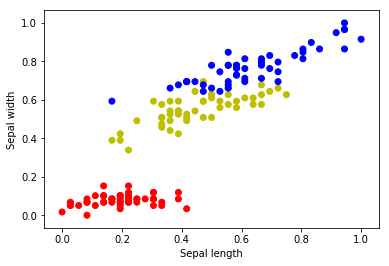

In [8]:
iris = load_iris()
X = iris.data[:,::2]  # comprimento das sépalas e pétalas, indices 0 e 2
Xc = X - X.min(axis=0)
Xc /= Xc.max(axis=0)

Y = iris.target

#X[:,0] = Sepal lenght
#X[:,1] = Sepal width
#define  colors to be red, yellow and blue
colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [9]:
Y_oh = np_utils.to_categorical(Y, 3) 
print(Y[0:5])
print(Y_oh[0:5])

[0 0 0 0 0]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


## Criando o modelo no Torch

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)


In [10]:
units = n_classes = 3 
model = Sequential() 
model.add(Dense(units, input_dim=2, activation='softmax',kernel_initializer='zero')) 


In [11]:
sgd = SGD(lr=0.15)
model.compile(optimizer=sgd, loss='categorical_crossentropy') 

In [12]:
n_samples = Xc.shape[0] # number of training examples
print('n_samples eh = ',n_samples)
#print('n saples = ', X.shape)
batch_size = n_samples 
epochs = 10000
history = model.fit(Xc, Y_oh, batch_size=batch_size, epochs=epochs,verbose=0)

n_samples eh =  150


In [13]:
loss = model.evaluate(Xc, Y_oh, verbose=0)
print('Final loss:',loss)

W = model.get_weights()
print('Bias:\n', W[1])
print('W:\n', W[0])

Final loss: 0.206978316903
Bias:
 [ 7.00967312  1.62754452 -8.63716793]
W:
 [[ -3.02196813   1.76353407   1.25843966]
 [-14.71227741  -0.67161006  15.38386059]]


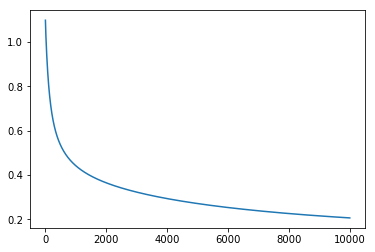

In [14]:
plt.plot(history.history['loss'])

In [15]:
Y_hat = model.predict_classes(Xc)

accuracy = np.sum(Y_hat == Y)/np.float(n_samples)
print()
print('Acurácia: ', accuracy)

 32/150 [=====>........................] - ETA: 0s
Acurácia:  0.96


In [16]:
import pandas as pd
print("Predicted Y and True Y")
data_history = pd.DataFrame({'Y predicted':Y_hat, 'True Y':Y})
data_history
#data_history.head(n=6)

Predicted Y and True Y


,True Y,Y predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [17]:
print('Matriz de confusão:')
import pandas as pd
pd.crosstab(Y_hat, Y)

Matriz de confusão:


col_0,0,1,2
row_0,,,
0,50,0,0
1,0,47,3
2,0,3,47


## Visualização do mapa de atributos

<a id='figura'></a>


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
def FSView_keras(Xc,Y,model):
    size = 100
    sepal_width = np.linspace(-0.05,1.05,size)
    sepal_lenght = np.linspace(-0.05,1.05,size)
    ws1, ws2 = np.meshgrid(sepal_width,sepal_lenght)
    w_grid = np.c_[ws1.ravel(), ws2.ravel()]
    Y_total = model.predict_classes(w_grid)
    
    
    class_0 = np.where(Y_total == 0)[0]
    class_1 = np.where(Y_total == 1)[0]
    class_2 = np.where(Y_total == 2)[0]

    fig = plt.figure(figsize=(8,5))
    
    #plot areas
    plt.scatter(w_grid[class_0][:,0],w_grid[class_0][:,1],color='#A6CEE3',label='Area Classe 0')
    plt.scatter(w_grid[class_1][:,0],w_grid[class_1][:,1],color='#FDBF6F',label='Area Classe 1')
    plt.scatter(w_grid[class_2][:,0],w_grid[class_2][:,1],color='#B15928', label = 'Area Classe 2')
    
    #plot true points
    plt.scatter(Xc[0:50, 0], Xc[0:50, 1], c='red',s=30,label='True class 0')
    plt.scatter(Xc[51:101, 0], Xc[51:101, 1], c='k',s=30,label='True class 1')
    plt.scatter(Xc[100:, 0], Xc[100:, 1], c='b',s=30,label='True class 1')

    #prepare the fig
    plt.title('Visualizacão do mapa de atributos')
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.ylim([-0.05,1.05])
    plt.xlim([-0.05,1.05])
    

    legend = plt.legend(loc='center left', bbox_to_anchor=(0.8, 0.5))
    plt.savefig('my_mapa_atributos.png')    
   # plt.show(fig)

 9440/10000 [===========================>..] - ETA: 0s

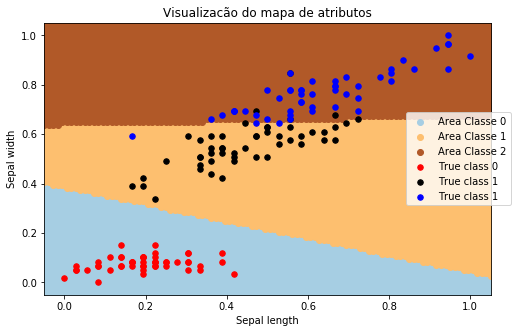

In [37]:
FSView_keras(Xc,Y,model)

# cria a figura do tamanho adequado para a correção automática
fig = plt.figure(figsize=(8,5))

plt.title('Visualizacão do mapa de atributos')
plt.savefig('my_mapa_atributos.png')